# 电影评论分类：二分类问题 

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words = 10000)

In [7]:
word_index = imdb.get_word_index()     #将一个单词映射为整数索引的字典
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?')for i in train_data[0]])

## 将整数序列编码为二进制矩阵  得以将数据输入神经网络中

In [12]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#将数据向量化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 构建网络

In [13]:
# 模型定义
from keras import models
from keras import layers

model = models.Sequential()

# 添加三层网络，relu函数将所有负值归零，sigmoid将任意值压缩到[0-1]其输出可看做概率值
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 编译模型
model.compile(optimizer='rmsprop',           #优化器
             loss = 'binary_crossentropy',   #损失函数
             metrics=['accuracy'])           #度量标准


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 验证方法

In [26]:
# 留出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

# 训练模型
history = model.fit(partial_x_train,      #fit方法返回一个history对象，有一个成员（一个字典，包含训练过程的所有数据）
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,     # 小批量数据
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.1444 - acc: 0.9466 - val_loss: 0.1412 - val_acc: 0.9489
Epoch 2/20
15000/15000 [==============================] - 1s 58us/step - loss: 0.1089 - acc: 0.9637 - val_loss: 0.1536 - val_acc: 0.9427
Epoch 3/20
15000/15000 [==============================] - 1s 60us/step - loss: 0.0926 - acc: 0.9694 - val_loss: 0.1716 - val_acc: 0.9355
Epoch 4/20
15000/15000 [==============================] - 1s 55us/step - loss: 0.0737 - acc: 0.9780 - val_loss: 0.1915 - val_acc: 0.9296
Epoch 5/20
15000/15000 [==============================] - 1s 56us/step - loss: 0.0617 - acc: 0.9821 - val_loss: 0.2177 - val_acc: 0.9205
Epoch 6/20
15000/15000 [==============================] - 1s 55us/step - loss: 0.0485 - acc: 0.9878 - val_loss: 0.2370 - val_acc: 0.9182
Epoch 7/20
15000/15000 [==============================] - 1s 54us/step - loss: 0.0418 - acc: 0.9891 - val_loss: 0.2660 - val_acc

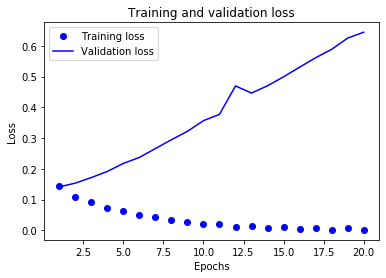

In [27]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt

history_dict = history.history             #history对象的history成员
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')     #bo表示圆点，b表示实线
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

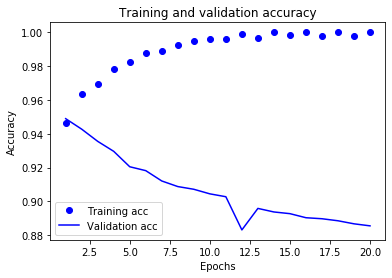

In [28]:
# 绘制训练精度和验证精度
plt.clf()   #清空图像
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [29]:
model.predict(x_test)   # （预测结果）得到评论为正面的可能性大小

array([[0.00174549],
       [1.        ],
       [0.95403016],
       ...,
       [0.00119472],
       [0.00731209],
       [0.7320549 ]], dtype=float32)

## 至此，模型已经训练并表示出来，可以看出在第4轮达到了最优值，故再训练一个模型

In [30]:
# 构建神经网络
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu' ))
model.add(layers.Dense(1, activation='sigmoid'))

# 配置模型
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)   # 测试数据损失和精度

Epoch 1/4
25000/25000 [==============================] - 1s 41us/step - loss: 0.4654 - accuracy: 0.8272
Epoch 2/4
25000/25000 [==============================] - 1s 36us/step - loss: 0.2687 - accuracy: 0.9077
Epoch 3/4
25000/25000 [==============================] - 1s 37us/step - loss: 0.2056 - accuracy: 0.9264
Epoch 4/4
25000/25000 [==============================] - 1s 51us/step


In [35]:
results

[0.28808176847457884, 0.8864399790763855]